# <font color="green"> Sentiment Analysis of IMDB reviews using NLP

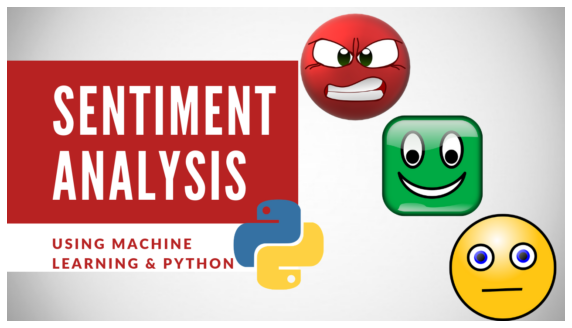

In [3]:
import os
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import Word
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
from PIL import  Image
%matplotlib inline

plt.figure(figsize=(10,10))
img = np.array(Image.open(r"D:\Sunny_Personal\OSU MSBA\Fall 2019\GitHub\IMDB_NLP\sentiment_analysis.png"))
plt.imshow(img,interpolation="bilinear")
plt.axis("off")
plt.show()

##  <font color="maroon"> Importing the libraries and dataset

In [4]:
os.chdir('D:\Sunny_Personal\OSU MSBA\Fall 2019\GitHub\IMDB_NLP')
imdb=pd.read_csv('IMDB Dataset.csv')
imdb.columns

Index(['review', 'sentiment'], dtype='object')

##  <font color="maroon"> Steps in Natural Language Processing

 https://link.springer.com/content/pdf/10.1007%2F978-1-4842-4267-4.pdf

    1. Lowercasing
    
    2. Punctuation removal

    3. Tokenization

    4. Stop words removal ( Default)
 
    5. Removing less frequent words
 
    6. Removing high frequent words
    
    7. Lemmatization
    
    8. Feature Extraction using TF-IDF
 
    9. Modeling

####  1. Lower casing and Punctuation removal

In [5]:
imdb['review'] = imdb['review'].apply(lambda x: x.lower())
imdb['review'] = imdb['review'].str.replace('[^\w\s]'," ")
patterndigits = '\\b[0-9]+\\b'
imdb['review'] = imdb['review'].str.replace(patterndigits,'')
imdb['review'] .head(1)

0    one of the other reviewers has mentioned that after watching just  oz episode you ll be hooked  they are right  as this is exactly what happened with me  br    br   the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word  br    br   it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away  br    br   i would say the main appeal of the show is due to the

#### 3.Tokenization

Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens

In [6]:
imdb['review']  = imdb['review'] .apply(lambda x:nltk.word_tokenize(x))
imdb['review'].head(1) 

0    [one, of, the, other, reviewers, has, mentioned, that, after, watching, just, oz, episode, you, ll, be, hooked, they, are, right, as, this, is, exactly, what, happened, with, me, br, br, the, first, thing, that, struck, me, about, oz, was, its, brutality, and, unflinching, scenes, of, violence, which, set, in, right, from, the, word, go, trust, me, this, is, not, a, show, for, the, faint, hearted, or, timid, this, show, pulls, no, punches, with, regards, to, drugs, sex, or, violence, its, is, hardcore, in, the, classic, use, of, the, word, br, br, it, is, called, oz, as, that, is, the, nickname, ...]
Name: review, dtype: object

#### 4. Stop words removal
In natural language processing, useless words (data), are referred to as stop words.
Examples : 'a', 'the','this','html'

In [7]:
#importing stopwords from natural language processing kit
stopwords=set(nltk.corpus.stopwords.words('english'))

#Defining the function to extract the tokens which are not  stopwords
def stopwords_removal(text):
    clean_text=[word for word in text if word not in stopwords]
    return clean_text

#Applying the function
imdb['review']=imdb['review'].apply(lambda x: stopwords_removal(x))
imdb['review'].head(1)

0    [one, reviewers, mentioned, watching, oz, episode, hooked, right, exactly, happened, br, br, first, thing, struck, oz, brutality, unflinching, scenes, violence, set, right, word, go, trust, show, faint, hearted, timid, show, pulls, punches, regards, drugs, sex, violence, hardcore, classic, use, word, br, br, called, oz, nickname, given, oswald, maximum, security, state, penitentary, focuses, mainly, emerald, city, experimental, section, prison, cells, glass, fronts, face, inwards, privacy, high, agenda, em, city, home, many, aryans, muslims, gangstas, latinos, christians, italians, irish, scuffles, death, stares, dodgy, dealings, shady, agreements, never, far, away, br, br, would, say, main, appeal, show, due, fact, goes, shows, dare, forget, ...]
Name: review, dtype: object

In [8]:

#Using list comprehension to count the occurence of all words
all_words = [item for i in imdb['review'] for item in i]
count_words = Counter(all_words)

#converting to dataframe using the dictionary like structure
word_frequency = pd.DataFrame.from_dict(count_words,orient='index').reset_index()

#Renaming the columns
word_frequency.rename(columns={'index':'word',0:'counts'},inplace=True)

#sorting the values from highest frequency to lowest
word_frequency.sort_values(by=['counts'],ascending=False,inplace=True)


print('Total number of words after removal of stop words are  ' +str(word_frequency.shape[0]))
print('Total count of words after removal of stop words are  ' +str(word_frequency['counts'].sum()))

Total number of words after removal of stop words are  101000
Total count of words after removal of stop words are  6111167


#### 5. Removing less frequent words

In [9]:
#Now the stopwords are those words which were occuring less than 30 times
# Choosing 30 times is not any standard
less_frequent_words=word_frequency[word_frequency['counts']<50].word.tolist()

#Appending these less frequent words to nltk stop words corpus
stopwords.update(less_frequent_words)

imdb['review']=imdb['review'].apply(lambda x: stopwords_removal(x))

#Using list comprehension
all_words = [item for i in imdb['review'] for item in i]
count_words = Counter(all_words)
#converting to dataframe using the dictionary like structure
word_frequency = pd.DataFrame.from_dict(count_words,orient='index').reset_index()
#Renaming the columns
word_frequency.rename(columns={'index':'word',0:'counts'},inplace=True)
#sorting the values from highest frequency to lowest
word_frequency.sort_values(by=['counts'],ascending=False,inplace=True)
print('Total number of words after removal of stop words are  ' +str(word_frequency.shape[0]))
print('Total count of words after removal of stop words are  ' +str(word_frequency['counts'].sum()))

Total number of words after removal of stop words are  11009
Total count of words after removal of stop words are  5559061


#### 6. Removing high frequency words with no importance

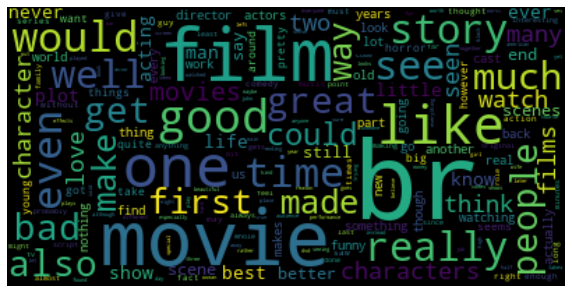

Few of the unimportant most occuring words are


['br', 'even', 'could', 'made', 'make', 'way', 'people', 'see', 'got', 'alsonever', 'going', 'though', 'something', 'really', 'still', 'know', 'seems']


In [10]:
wordcloud = WordCloud()

wordcloud.generate_from_frequencies(frequencies=count_words)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

more_frequent_words_no_imp=['br','even','could','made','make','way','people','see','got','also'
                               'never','going','though','something','really',
                               'still','know','seems']

print('Few of the unimportant most occuring words are')
print('\n')
print(more_frequent_words_no_imp)


In [11]:
import nltk
from nltk.corpus import stopwords

stopwords=set(nltk.corpus.stopwords.words('english'))

#Appending most frequently occuring words with no importance
stopwords.update(more_frequent_words_no_imp)

imdb['review']=imdb['review'].apply(lambda x: stopwords_removal(x))
imdb['review'].head(1)

0    [one, reviewers, mentioned, watching, oz, episode, hooked, right, exactly, happened, first, thing, struck, oz, brutality, scenes, violence, set, right, word, go, trust, show, faint, hearted, show, pulls, punches, regards, drugs, sex, violence, hardcore, classic, use, word, called, oz, given, maximum, security, state, focuses, mainly, city, experimental, section, prison, cells, glass, face, high, agenda, em, city, home, many, muslims, christians, italians, irish, death, stares, dodgy, shady, never, far, away, would, say, main, appeal, show, due, fact, goes, shows, dare, forget, pretty, pictures, painted, mainstream, audiences, forget, charm, forget, romance, oz, mess, around, first, episode, ever, saw, struck, nasty, surreal, say, ready, ...]
Name: review, dtype: object

In [12]:
#Using list comprehension
all_words = [item for i in imdb['review'] for item in i]
count_words = Counter(all_words)

#converting to dataframe using the dictionary like structure
word_frequency = pd.DataFrame.from_dict(count_words,orient='index').reset_index()

#Renaming the columns
word_frequency.rename(columns={'index':'word',0:'counts'},inplace=True)

#sorting the values from highest frequency to lowest
word_frequency.sort_values(by=['counts'],ascending=False,inplace=True)

print('Total number of words after removal of stop words are  ' +str(word_frequency.shape[0]))
print('Total count of words after removal of stop words are  ' +str(word_frequency['counts'].sum()))

Total number of words after removal of stop words are  10993
Total count of words after removal of stop words are  5139904


#### 7. Lemmatization
     Lemmatization was performed instead of stemming since the former used  english voculabulary 
     to stem the words to the root

In [13]:
lemmatizer=nltk.WordNetLemmatizer()

def lemmatize_words(text):
    lemma_text=[lemmatizer.lemmatize(word) for word in  text]
    return lemma_text

imdb['review']= imdb['review'] .apply(lambda x:lemmatize_words(x))


#### 8. Feature Extraction

https://towardsdatascience.com/natural-language-processing-nlp-for-machine-learning-d44498845d5b

### Vectorizing Data: Bag-Of-Words

 Bag of Words (BoW) or CountVectorizer describes the presence of words within the text data. It gives a result of 1 if present in the sentence and 0 if not present. It, therefore, creates a bag of words with a document-matrix count in each text document.

Disadvantages
    
    1. Bag of Words tells us whether a word appears in a sentence, and cannot measure the 
       importance of different words
    2. In very large corpus, such as thousands of books, that the length of the vector might be 
       thousands or millions of positions. Further, each document may contain very few of the
       known words in the vocabulary.This results in a vector with lots of zero scores, called a 
       sparse vector or sparse representation.Sparse vectors require more memory and computational 
       resources when modeling and the vast number of positions or dimensions can make the 
       modeling process very challenging for traditional algorithms. 

### Vectorizing Data: N-Grams

    N-grams are simply all combinations of adjacent words or letters of length n that we can find in our source text. Ngrams with n=1 are called unigrams. Similarly, bigrams (n=2), trigrams (n=3) and so on can also be used.

### Vectorizing Data: TF-IDF
    It computes “relative frequency” that a word appears in a document compared to its frequency across all documents. It is more useful than “term frequency” for identifying “important” words in each document (high frequency in that document, low frequency in other documents).


### <font color='maroon'> Vectorizing Data: TF-IDF has used for the feature extraction
    
https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/
    
TF-IDF score represents the relative importance of a term in the document and the entire corpus. 
TF-IDF score is composed by two terms: 

    1. normalized Term Frequency (TF)
    2. Inverse Document Frequency (IDF)

    TF(t) = (Number of times term t appears in a document)/(Total number of terms in the document)
    IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

    TF-IDF Vectors can be generated at different levels of input tokens(words, characters,n-grams)

        1. Word Level TF-IDF : Matrix representing tf-idf scores of every term in different 
                               documents
                               
        2. N-gram Level TF-IDF : N-grams are the combination of N terms together. This Matrix 
           representing tf-idf scores of N-grams
           
        3. Character Level TF-IDF : Matrix representing tf-idf scores of character level n-grams
           in the corpus

TF-IDF has beeen generated at word level for this project

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer='word',
                             tokenizer=lambda doc: doc, 
                             lowercase=False,
                             token_pattern=r'\w{1,}',
                             min_df=10, #minimum number of documents a word has to be appear in
                             max_df=0.7 #maximum proportion of documents a word can appear in 
                            )
    
processed_reviews=tfidf_vect.fit_transform(imdb['review'])

processed_reviews_df = pd.DataFrame(processed_reviews.todense(),columns=tfidf_vect.get_feature_names())

#### 9. Modeling

In [15]:
# create training and testing data set (70-30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_reviews, imdb['sentiment'], test_size=0.3,random_state=12345)

Accuracy using Naive Bayes Classifier is 0.857


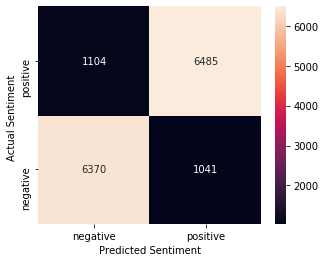

In [31]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(X_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print('Accuracy using Naive Bayes Classifier is ' +str(score))

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred,labels=['positive','negative'])

conf_matrix = confusion_matrix(y_test,pred)
fig, ax = plt.subplots(figsize=(5,4))
heatmap=sns.heatmap(conf_matrix,annot=True,fmt="d",xticklabels=['negative', 'positive'],
                                                   yticklabels=['negative', 'positive'])
ax.set_ylim([0,2])
plt.ylabel('Actual Sentiment ')
plt.xlabel('Predicted Sentiment')
plt.show()


In [16]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier(n_estimators=100, bootstrap = True)
rfc.fit(X_train,y_train)
# predictions
y_pred = rfc.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.85


#### Confusion Matrix

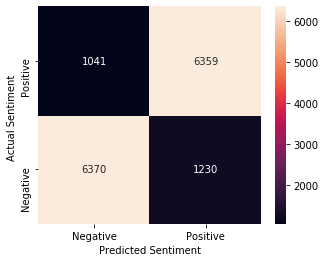

In [17]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_pred,y_test)
fig, ax = plt.subplots(figsize=(5,4))
heatmap=sns.heatmap(conf_matrix,annot=True,fmt="d",xticklabels=['Negative', 'Positive'],yticklabels=['Negative', 'Positive'])
ax.set_ylim([0,2])
plt.ylabel('Actual Sentiment ')
plt.xlabel('Predicted Sentiment')
plt.show()